# 3 教師あり学習
## 3.1 1次元入力の線形回帰モデル
### 3.1.1 データの準備

In [17]:
from __future__ import annotations

import numpy as np
import matplotlib.pyplot as plt

# 小数点以下の表示桁数を3桁にする (A)
np.set_printoptions(precision=3, suppress=True)
plt.rcParams['font.size'] = 14              # フォントサイズを設定 (B)
plt.rcParams['figure.figsize'] = (7, 4)     # 図のサイズ指定 (C)

n = 30                              # データ数
noise = 5                           # ノイズの大きさ
np.random.seed(3)                   # 乱数のseedを指定
xs = np.random.rand(n) * 30         # xs(気温)を一様乱数で決める
ts = (0.1 * xs) ** 4 + 1 * xs + 50 \
    + np.random.randn(n) * noise    # ts(売り上げ)を決める (D)
x_range = (0, 30)                   # 表示用のxの範囲
t_range = (30, 140)                 # 表示用のtの範囲

print('xs', xs)
print('')
print('ts', ts)


xs [16.524 21.244  8.727 15.325 26.788 26.889  3.768  6.217  1.544 13.224
  0.896 13.705 19.474  8.355 20.288 17.726  0.719 16.766  7.778 12.453
  8.506 20.794 13.214  4.706 16.339 23.409  9.191  6.659 11.639 28.092]

ts [ 70.135  90.464  63.033  80.721 122.065 126.031  49.769  44.271  46.926
  61.163  56.516  66.573  75.741  62.075  85.447  68.883  47.736  71.724
  53.774  65.007  47.788  88.152  71.328  59.019  79.008 109.037  67.342
  51.264  67.704 131.06 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


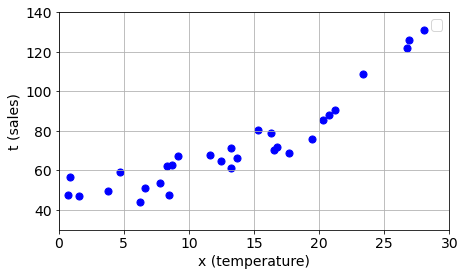

In [5]:
def plt_setting():                          # グラフの調整の関数定義 (B)
    plt.legend()
    plt.xlim(x_range)
    plt.ylim(t_range)
    plt.xlabel('x (temperature)')
    plt.ylabel('t (sales)')
    plt.grid(axis='both')

plt.scatter(xs, ts, marker='o', s=50, color='b')

plt_setting()                               # グラフの調整実行 (C)

plt.show()



### 3.1.2 予測をすることは線を引くこと
* 線形回帰等の回帰分析では、与えられたデータ群にそうような関数（グラフ）をパラメータ調整（学習）で導き、テストデータの入力と解答データが一致するようにすることで、未知の値の予測ができる。

### 3.1.3 線形回帰モデル（直線モデル）
* 前章のまとめから⇒教師あり学習＝関数のグラフを描くこと
と解釈できる。
* ではどう２次元以上の場合どのように線を引くか。
* 以下の直線式を考える
  * $y = w_0 x + w_1$
  * $w:重み(weight)$
  * このモデルは特に「線形回帰モデル」と呼ばれる。
* この$w$をパラメータと呼び、この値を調節（学習）することで入力$x$を受けて出力$y$を予測する.
* ２次元以上の場合は、
  * $y = w_0x_0 + w_1x_1 + ... + w_n-1x_n-1 + w_n$

50.0
[50. 60. 70.]


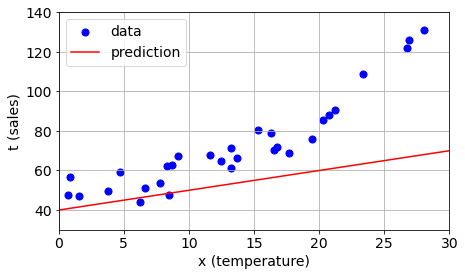

In [6]:
from numpy import ndarray, floating

def liner_reg(x: float|ndarray, w0:float, w1:float) -> float | ndarray:
    return w0 * x + w1

l1 = liner_reg(10.0, 1.0, 40.0)
l2 = liner_reg(np.array([10,20, 30]), 1.0, 40.0)
print(l1)
print(l2)

xs_pred: ndarray = np.linspace(x_range[0], x_range[1], 100)
ys_pred: ndarray = liner_reg(xs_pred, 1.0, 40.0) #type: ignore

plt.scatter(xs, ts, label='data', marker='o', s=50, color='b')
plt.plot(xs_pred, ys_pred, label='prediction', color='r')
plt_setting()
plt.show()


* 上記の場合は、手入力で適当にパラメータを決定したので関数のグラフは実データと大きくそれている。

### 3.1.4 平均二乗誤差（MSE）
* パラメータを調整するにあたって、予測値と実測値のずれ具合（誤差）を計算する必要がある。
* 単純に、「実測値-予測値」では誤差がマイナス（負）になるため、計算上誤差がないということになる。誤差⇒ずれの度合であるので、マイナスだと定義に反する。
* 平均二乗誤差（MSE:mean squared error）は、予測値と実測値のずれ具合を示す１つの指標値。負の値をとらないため全データとのずれを示す指標として使える。$J$で示す。
$$J = \frac{1}{N}\Sigma_{k=0}^{N-1}(t_k - y_k)^2$$
$$t_k:目標値（実測値）,y_k:予測値$$


In [7]:
def mse_liner_reg(x: float|ndarray, t: float|ndarray, w0:float, w1:float) -> float:
    y: float|ndarray = liner_reg(x, w0, w1)
    mse: float = np.mean((t - y) ** 2)
    return mse

mse: float = mse_liner_reg(xs, ts, 1.0, 40.0)
print(mse)

637.0548123550662


### 3.1.5 勾配法
* MSEが最小値になる重み($w_0, w_1等$)の組み合わせの近似値を見つける手法。
* 偏微分をつかって求まる。
* 要は、重みを更新していってより傾きの小さいくぼみを探す。
* 学習の過程で、誤差が小さくなっていくことを示すグラフを「学習曲線と呼ぶ」

### 3.1.6 解析解
* 勾配法とは異なり、厳密な解（$w_0, w_1$）の組み合わせを求める手法。
* ムーア・ペンローズの疑似逆行列を使って、$w_0, w_1$を求める。
  * 入力データ$X = \left[\begin{array}{c}
            x_0 & 1\\
            x_1 & 1\\
            ... & ...\\
            x_{n-1} & 1\\
        \end{array}\right] \quad$
  * 目標データ$t = \left[\begin{array}{c}
            t_0 \\
            t_1 \\
            ... \\
            t_n-1 \\
        \end{array}\right] \quad$
  * これらを用いてパラメータ$w$は以下の式で求められる。
  $$
  w = (X^T * X)^{-1} * X^T * t
  $$

In [8]:
X : ndarray = np.c_[xs, np.ones(len(xs))]
w = np.linalg.inv(X.T @ X) @ X.T @ ts.reshape(-1, 1)
w = w.reshape(-1)
print(w)

[ 2.726 36.221]


* 解析解の方が、計算量が少ない分勾配法よも早く終わる。
* ただし、解が存在する線形回帰モデル等にしか使用できないたデメリットもある。

## 3.2 1次元入力のニューラルネットワーク

### 3.2.1 神経細胞（ニューロン）
* ニューロン：脳の神経細胞
* シナプス：他のニューロンとの窓口的な奴
* 軸索：ニューロンのシナプス同士を結合するもの。糸電話の糸みたいな奴。
* ニューロンは、他のニューロンに対しシナプスを中継して「電気信号（パルス）」を常に送ることができ、それを受け取ったニューロン内部の「膜電位」が変化する。
* この膜電位の変化量は、シナプスの伝達強度に左右される。
* この電気信号がある一定値を超えたとき、他のニューロンに対して電気信号が伝達される。
* 我々生物の「学習」能力はこの電気信号による膜電位の変化の蓄積によるものだと考えられる。

### 3.2.2 ニューロンモデル


In [9]:
import numpy as np
from numpy import ndarray, floating
from matplotlib import pyplot as plt

In [10]:
def setting_matplot() -> None:
    np.set_printoptions(precision=3, suppress=True)
    plt.rcParams['font.size'] = 14
    plt.rcParams['figure.figsize'] = (7, 4)
    
    
    
n:int = 30 #データ数
noise:float = 5.0 #ノイズの大きさ

np.random.seed(3) #乱数のseedを指定
xs = np.random.rand(n) * 30 #xs(気温)を一様乱数で決める
ts = (0.1 * xs) ** 4 + 1 * xs + 50 + np.random.randn(n) * noise #ts(売り上げ)を決める (D)

x_range = (0, 30) #表示用のxの範囲
t_range = (30, 140) #表示用のtの範囲

* 今、$D+1個$入力$X$を$X = [ x_0, x_1, ..., x_{D-1}, x_D ]^T$として、$x_D$は常に1を入力する「ダミーデータ」を考える。
* 各入力$x_k$に重み$w_k$をかけたものの総和を$u$としたとき、１つのニューロンに入る総和$u$は以下の式で示される。
$$u = w_0x_0 + .... + w_dx_d + ... + w_{D-1}x_{D-1} + w_{D}x_{D} $$

* この総和$u$が「活性化関数」と呼ばれる関数に入力され、その出力値を$y$とする。
  * シグモイド関数やReLu関数がある。
  * 特性に応じて使い分ける。
  * 活性化関数がないと、ニューラルネットワークは線形回帰のような単純な構造の関数しかもてないため、より複雑な関数で表現することが望まれるニューラルネットワークには必要不可欠である。

* シグモイド関数$\sigma(u)$
$$\sigma(u) = \frac{1}{1 + \exp(-x)}$$

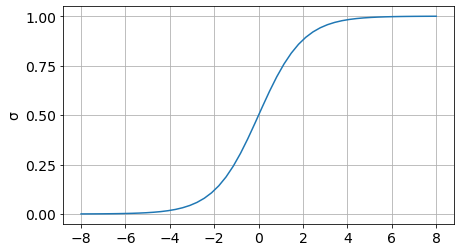

In [11]:
def sigmoid_function(x:float | ndarray) -> float | ndarray:
    return 1 / (1 + np.exp(-x))



upper: int = 8
lower: int = -8
xx: ndarray = np.linspace(upper, lower)
yy = sigmoid_function(xx)

plt.plot(xx, yy)
plt.yticks(ticks=[0.0, 0.25, 0.50, 0.75, 1.0])
plt.ylabel('σ')
plt.grid()

plt.show()

* 上記のグラフの通り、シグモイド関数は入力値にかかわらず出力値は0~1の範囲に収まる。
  * 確率として使えるよね？って感じ。

* 次の入力$X = [x_0, x_1]^T$を考える。
* この時、入力値の総和$u = w_0x_0 + w_1$
  * $x_1 = 1のダミー$

この入力をシグモイド関数に入れ、描画することを考える。
* $\sigma(u) = \sigma(u = w_0x_0 + w_1)$

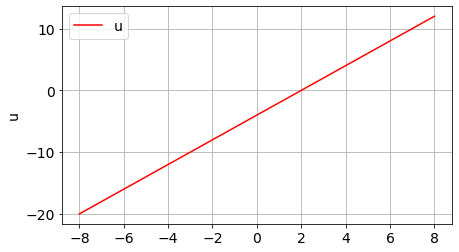

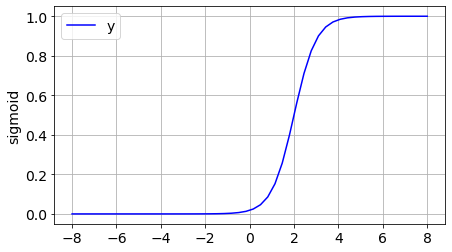

In [12]:
w0: int = 2
w1: int = -4

x: ndarray = np.linspace(-8, 8)
u: ndarray = w0 * x + w1
y = sigmoid_function(u)

plt.plot(x, u, label='u', color="red")
plt.legend()
plt.ylabel('u')
plt.grid()
plt.show()


plt.plot(x, y, label='y', color="blue")
plt.legend()
plt.ylabel('sigmoid')
plt.grid()
plt.show()

### 3.2.3 ニューラルネットワークモデル

* ニューロンモデルを複数組合わせたもの。
* 単一のニューロンモデル（単純パーセプトロン）よりも複雑なモデルを構築することができる。
* なおここからは、TensorFlowの命名規則に従い、ニューロンモデル＝ユニットと表記する。
  * $w_{行き先ユニット番号, 入力ID}$

* ニューラルネットワークモデルは以下3層のユニットの集合体をもつ。
  * 入力層（input layer）
  * 中間層（hidden layer）
  * 出力層（output layer）
* 本教科書では、入力層を引いた中間層と出力層の「（層数）ネットワークモデル」とする。 

* 今、入力ユニット2、中間層のユニット数が2のネットワークモデルを考える。
  * ユニット0
  * ユニット1

* これらの中間層が受け取る入力は次のとおり。$※x_1 = 1のダミー$
  * ユニット0: $w_{0, 0}x_0 と w_{0, 1}x_1$
  * ユニット1: $w_{1, 0}x_0 と w_{1,1}x_1$
* ここから、各中間層のユニットの出力値を活性化関数をシグモイド関数として、$z_0, z_1$とする。
  * $z_0 = \sigma(w_{0, 0}x_0+w_{0, 1}x_1)$
  * $z_1 = \sigma(w_{1, 0}x_0+w_{1, 1}x_1)$

* $z_0, z_1$を受け取る、出力ユニットは$z_0, z_1$に重み$v$をかけた総和を、そのまま出力値とする。
  * $y = v_0z_0 + v_1z_1 + v_2$

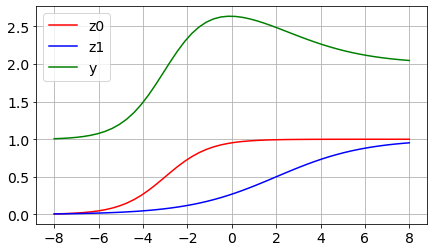

In [13]:
w00: int = 1
w01: int = 3
w10: float = 0.5
w11: int = -1
v0 : int = 2
v1: int = -1
v2: int = 1

x: ndarray = np.linspace(-8, 8)
z0 = sigmoid_function(w00 * x + w01)
z1 = sigmoid_function(w10 * x + w11)
y: float | ndarray = v0 * z0 + v1 * z1 + v2

plt.plot(x, z0, label = 'z0', color = 'red')
plt.plot(x, z1, label = 'z1', color = 'blue')
plt.plot(x, y, label = 'y', color = 'green')
plt.legend()
plt.grid()
plt.show()



In [14]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential



In [20]:
medium_unit = Dense(32, activation="sigmoid", input_dim=1) # 中間層の設定：32個のユニット、活性化関数はsigmoid、入力は1次元
output_unit = Dense(1, activation="linear") # 出力層の設定：1個のユニット。

model = Sequential( #ニューラルネットワークモデルの設定
    [
        medium_unit,
        output_unit,
    ]
)

model.compile(optimizer="adam", loss="mse") #ニューラルネットワークモデルのパラメータ設定：学習率調整はadam、損失関数はmse

# 1行30列 ⇒ 30行1列に転置
x_datas = xs.reshape(-1, 1) 
target_datas = ts.reshape(-1, 1)

learing = model.fit( #学習：学習ステップ数等の設定
    x_datas, 
    target_datas,
    batch_size=len(x_datas),
    epochs=10000,
    verbose=0
)



In [21]:
# 予測
input_pred = np.linspace(x_range[0], x_range[1], 100).reshape(-1, 1)
output_pred = model.predict(input_pred)


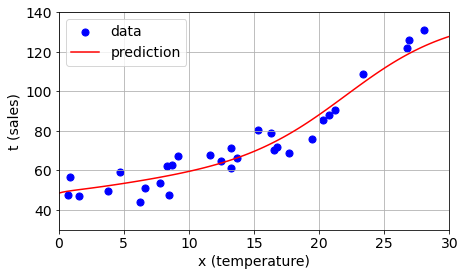

In [22]:
# 結果の表示

plt.scatter(x_datas, target_datas, label='data', marker='o', s=50, color='b')
plt.plot(input_pred, output_pred, label='prediction', color='r')

plt_setting()

plt.show()



f:\Learning\強化学習を学びたい人が最初に読む本\.venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25613 (\N{CJK UNIFIED IDEOGRAPH-640D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
f:\Learning\強化学習を学びたい人が最初に読む本\.venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
f:\Learning\強化学習を学びたい人が最初に読む本\.venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38306 (\N{CJK UNIFIED IDEOGRAPH-95A2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
f:\Learning\強化学習を学びたい人が最初に読む本\.venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


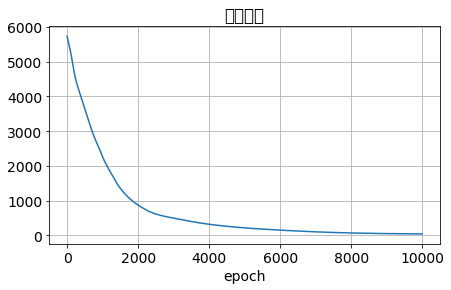

In [23]:
plt.plot(learing.history['loss'])
plt.title("損失関数")
plt.xlabel("epoch")
plt.grid()
plt.show()

### 3.2.4 ReLU関数
* シグモイド関数では、プラトーや鞍点につかまり、学習が思うように進まない（誤差が減少しない）ということがある。
* そこで、ReLU関数を使うことで、この問題を解決することができた。
* 近年のニューラルネットワークには、ReLU関数が普及している。
$y = \{x(x > 0), 0 (x <= 0)\}$

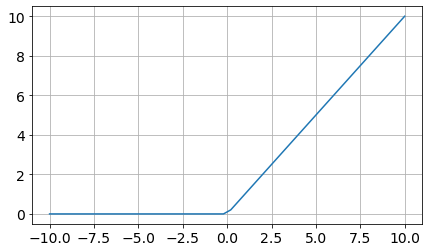

In [26]:
def relu(x:ndarray) -> ndarray:
    return np.maximum(x, 0)

x: ndarray = np.linspace(-10, 10)
y: ndarray = relu(x)

plt.plot(x, y, label='relu')
plt.grid()
plt.show()

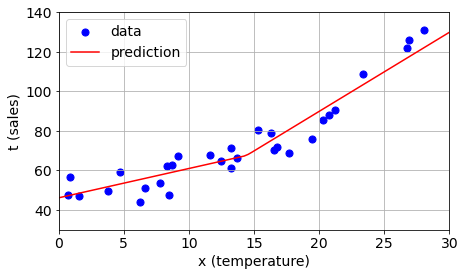

In [27]:
medium_unit = Dense(32, activation="relu", input_dim=1) # 中間層の設定：32個のユニット、活性化関数はrelu、入力は1次元
output_unit = Dense(1, activation="linear") # 出力層の設定：1個のユニット。

model = Sequential( #ニューラルネットワークモデルの設定
    [
        medium_unit,
        output_unit,
    ]
)


model.compile(optimizer="adam", loss="mse") #ニューラルネットワークモデルのパラメータ設定：学習率調整はadam、損失関数はmse

# 1行30列 ⇒ 30行1列に転置
x_datas = xs.reshape(-1, 1) 
target_datas = ts.reshape(-1, 1)

learing = model.fit( #学習：学習ステップ数等の設定
    x_datas, 
    target_datas,
    batch_size=len(x_datas),
    epochs=10000,
    verbose=0
)

# 予測
input_pred = np.linspace(x_range[0], x_range[1], 100).reshape(-1, 1)
output_pred = model.predict(input_pred)


# 結果の表示

plt.scatter(x_datas, target_datas, label='data', marker='o', s=50, color='b')
plt.plot(input_pred, output_pred, label='prediction', color='r')

plt_setting()

plt.show()


### 3.2.5 オーバーフィッティング（過学習）
* 生成される関数モデルが学習データに適応しすぎて、未知のデータに対応できなくなる現象。

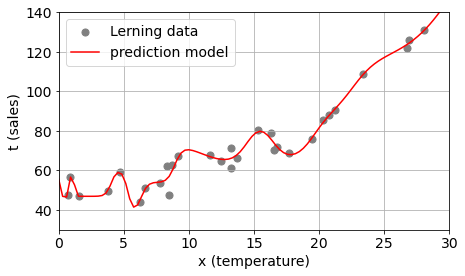

In [32]:
medium_unit = Dense(32, activation="sigmoid", input_dim=1) # 中間層の設定：32個のユニット、活性化関数はsigmoid、入力は1次元
output_unit = Dense(1, activation="linear") # 出力層の設定：1個のユニット。

model = Sequential( #ニューラルネットワークモデルの設定
    [
        medium_unit,
        output_unit,
    ]
)


model.compile(optimizer="adam", loss="mse") #ニューラルネットワークモデルのパラメータ設定：学習率調整はadam、損失関数はmse

# 1行30列 ⇒ 30行1列に転置
x_datas = xs.reshape(-1, 1) 
target_datas = ts.reshape(-1, 1)

learing = model.fit( #学習：学習ステップ数等の設定
    x_datas, 
    target_datas,
    batch_size=len(x_datas),
    epochs=40000,
    verbose=0
)

# 予測
input_pred = np.linspace(x_range[0], x_range[1], 100).reshape(-1, 1)
output_pred = model.predict(input_pred)


# 結果の表示

plt.scatter(x_datas, target_datas, label='Lerning data', marker='o', s=50, color='gray')
#plt.scatter(input_pred, output_pred, label='Prediction data', marker='o', s=50, color='r')
plt.plot(input_pred, output_pred, label='prediction model', color='r')

plt_setting()

plt.show()